In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from collections import namedtuple

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

from svhn_dataset import SVHN
from autoaugment import distort_image_with_autoaugment, autoaugment_image

In [3]:
def draw_image_and_bb(image, bbs):
    #print(f'size: {image.shape}')
    plt.imshow(image)
    ax = plt.gca()
    for bb in bbs:
        ymin, xmin, ymax, xmax = bb.numpy()
        y, x = (ymin + ymax) / 2, (xmin + xmax) / 2
        h, w = (ymax - ymin), (xmax - xmin)
        rect = patches.Rectangle((xmin, ymin),w,h,linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    plt.show()

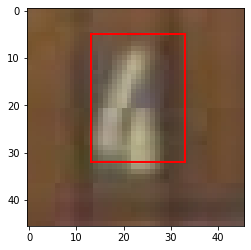

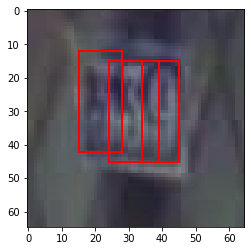

In [4]:
for sample in SVHN().train.take(2).map(SVHN.parse):
    image = sample['image']
    bboxes = sample['bboxes']
    draw_image_and_bb(image, bboxes)

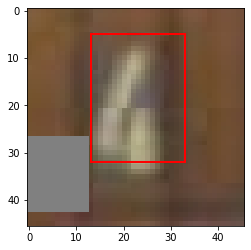

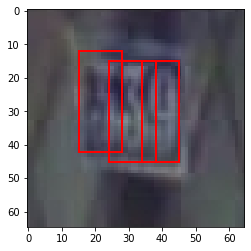

In [62]:
Config = namedtuple('Config', [
    'augmentation_name',
    'cutout_max_pad_fraction',
    'cutout_bbox_replace_with_mean',
    'cutout_const',
    'translate_const',
    'cutout_bbox_const',
    'translate_bbox_const',
])

config = Config( 
    augmentation_name='v0',
    cutout_max_pad_fraction=0.75,
    cutout_bbox_replace_with_mean=False,
    cutout_const=10,
    translate_const=10,
    cutout_bbox_const=50,
    translate_bbox_const=10)

for sample in SVHN().train.take(2).map(SVHN.parse):
    example = autoaugment_image(sample, config)
    draw_image_and_bb(example['image'], example['bboxes'])